In [52]:
import matplotlib
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os


import seaborn as sns
from matplotlib import rcParams

#绘图前的基本设置

myfont = fm.FontProperties(fname=r'C:\Windows\Fonts\Times New Roman.tiff') # 设置字体

# 设置matplotlib正常显示中文和负号

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
# matplotlib.rcParams['font.sans-serif']=['NSimSun']   # 用黑体显示中文
# matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
matplotlib.rcParams['font.size'] = 14
# matplotlib.rcParams['font.family'] = 'sans-serif'  
matplotlib.rcParams['font.sans-serif'] = 'Times New Roman'  # NSimSun 新宋体字体   宋体：SimSuncss

%matplotlib inline  
#内嵌绘图，并且可以省略掉plt.show()这一步
os.chdir(r'E:\BaiduSyncdisk\Futureheatwave\data\downscaling')


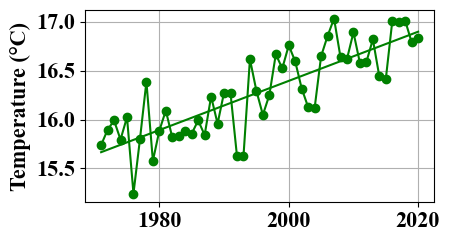

In [31]:
# Adding a regression line to the plot on top of the existing temperature time series

import numpy as np
from scipy import stats

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(summer_avg_temp_by_year['year'], summer_avg_temp_by_year['mean_temp'])

# Calculate the regression line values
regression_line = slope * summer_avg_temp_by_year['year'] + intercept

# Plot the original data with the regression line
plt.figure(figsize=(4.5, 2.5))

# Plotting the original temperature data
plt.plot(summer_avg_temp_by_year['year'], summer_avg_temp_by_year['mean_temp'], marker='o', linestyle='-', color='g', label='Mean Summer Temperature')

# Plotting the regression line
plt.plot(summer_avg_temp_by_year['year'], regression_line, color='g', label=f'Regression Line (R² = {r_value**2:.2f})')

# Formatting the plot
plt.ylabel('Temperature (°C)')
plt.grid(True)
# plt.legend(fontsize=13)
# leg=plt.legend(fontsize=13,bbox_to_anchor=(0.3, 1.03, 0.7,1.12), loc='lower left',handletextpad=0.4,
#                       ncol=10, mode="expand", borderaxespad=0.,handlelength=1.5)
# Save the figure with a resolution of 400 dpi
plt.savefig('TM-timeserise_regression.png', dpi=400)

# Display the plot
plt.show()


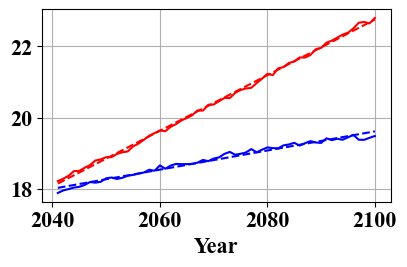

In [48]:
# Adding regression lines to both SSP2-4.5 and SSP5-8.5 temperature curves

# Perform linear regression for SSP2-4.5
slope_245, intercept_245, r_value_245, p_value_245, std_err_245 = stats.linregress(ssp245_avg_temp_by_year['year'], ssp245_avg_temp_by_year['mean_temp'])

# Calculate the regression line values for SSP2-4.5
regression_line_245 = slope_245 * ssp245_avg_temp_by_year['year'] + intercept_245

# Perform linear regression for SSP5-8.5
slope_585, intercept_585, r_value_585, p_value_585, std_err_585 = stats.linregress(ssp585_avg_temp_by_year['year'], ssp585_avg_temp_by_year['mean_temp'])

# Calculate the regression line values for SSP5-8.5
regression_line_585 = slope_585 * ssp585_avg_temp_by_year['year'] + intercept_585

# Plot both temperature curves along with their regression lines
plt.figure(figsize=(4.5, 2.5))

# Plot SSP2-4.5 temperature curve
plt.plot(ssp245_avg_temp_by_year['year'], ssp245_avg_temp_by_year['mean_temp'], color='blue', label='SSP2-4.5')

# Plot SSP2-4.5 regression line
plt.plot(ssp245_avg_temp_by_year['year'], regression_line_245, color='blue', linestyle='--', label=f'SSP2-4.5 Regression (R² = {r_value_245**2:.2f})')

# Plot SSP5-8.5 temperature curve
plt.plot(ssp585_avg_temp_by_year['year'], ssp585_avg_temp_by_year['mean_temp'], color='red', label='SSP5-8.5')

# Plot SSP5-8.5 regression line
plt.plot(ssp585_avg_temp_by_year['year'], regression_line_585, color='red', linestyle='--', label=f'SSP5-8.5 Regression (R² = {r_value_585**2:.2f})')

# Formatting the plot
plt.xlabel('Year')
# plt.ylabel('Mean Temperature (°C)')
# plt.title('Projected Mean Summer Temperatures with Regression Lines (SSP2-4.5 vs SSP5-8.5, 2041-2100)')
plt.grid(True)
# plt.legend()

# Save the figure with regression lines
plt.savefig('SSP245_SSP585_temperature_regression_comparison.png', dpi=400)

# Display the plot
plt.show()


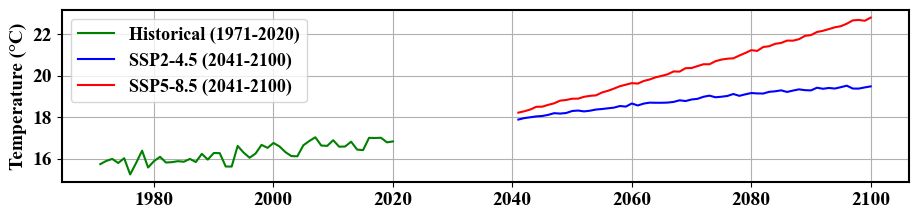

In [54]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(9, 2))

# Plot historical temperature data (1971-2020)
ax.plot(summer_avg_temp_by_year['year'], summer_avg_temp_by_year['mean_temp'], color='green', label='Historical (1971-2020)')

# Plot SSP2-4.5 temperature curve (2041-2100)
ax.plot(ssp245_avg_temp_by_year['year'], ssp245_avg_temp_by_year['mean_temp'], color='blue', label='SSP2-4.5 (2041-2100)')

# Plot SSP5-8.5 temperature curve (2041-2100)
ax.plot(ssp585_avg_temp_by_year['year'], ssp585_avg_temp_by_year['mean_temp'], color='red', label='SSP5-8.5 (2041-2100)')

# Formatting the plot
ax.set_ylabel('Temperature (°C)')
ax.grid(True)
ax.legend(fontsize=13)

# Set x-axis ticks (optional: adjust the values as needed)
# ax.set_xticks([1975, 2000, 2025, 2050, 2075, 2100])
# ax.set_yticks([15,17,19,21,23])
ax.set_yticks([16,18,20,22])
# Adjust the layout
plt.tight_layout(pad=0.02, h_pad=0.1, w_pad=0.1)
# Adding thicker outer border
for spine in ax.spines.values():
    spine.set_linewidth(1.5)  # You can adjust the width here
# Save the combined plot
plt.savefig('Historical_Future_Temperature_Comparison.png', dpi=400,facecolor="none", transparent=True)

# Display the plot
plt.show()


Reference Stats: {'median': '16.92', 'quartiles': ['13.98', '18.76'], 'range': ['6.35', '21.68']}
SSP245 Stats: {'median': '19.45', 'quartiles': ['16.51', '21.31'], 'range': ['11.65', '23.00']}
SSP585 Stats: {'median': '20.99', 'quartiles': ['18.13', '22.89'], 'range': ['12.14', '26.24']}
max_density: 0.41000000000000003


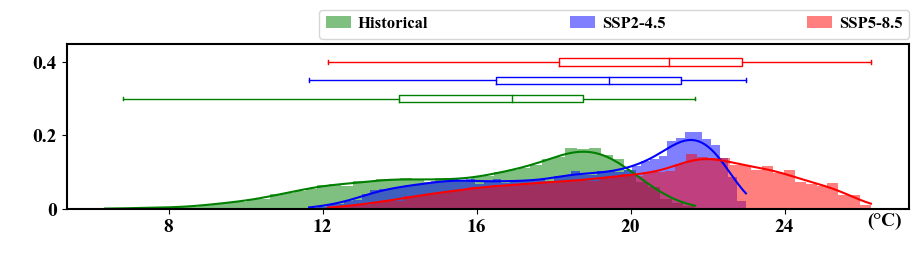

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_reference = pd.read_csv('mean_daily_temperatures_1971_2000.csv')
df_ssp245 = pd.read_csv('SSP245_TM_2041_2100.csv')
df_ssp585 = pd.read_csv('SSP585_TM_2041_2100.csv')

# We will use the mean_temp column for plotting the distributions
reference_temps = df_reference['mean_temp']
ssp245_temps = df_ssp245['mean_temp']
ssp585_temps = df_ssp585['mean_temp']

# Function to calculate the statistics for the boxplot data
def calculate_boxplot_stats(data):
    stats = {
        "median": f"{np.median(data):.2f}",
        "quartiles": [f"{np.percentile(data, 25):.2f}", f"{np.percentile(data, 75):.2f}"],
        "range": [f"{np.min(data):.2f}", f"{np.max(data):.2f}"]
    }
    return stats

# Calculate stats for each dataset
reference_stats = calculate_boxplot_stats(reference_temps)
ssp245_stats = calculate_boxplot_stats(ssp245_temps)
ssp585_stats = calculate_boxplot_stats(ssp585_temps)

# Print the stats with two decimal places
print("Reference Stats:", reference_stats)
print("SSP245 Stats:", ssp245_stats)
print("SSP585 Stats:", ssp585_stats)
# Setting up the plot area
fig, ax = plt.subplots(figsize=(9, 2.5))

# Plotting the distributions
sns.histplot(reference_temps, kde=True, color='green', ax=ax, stat='density', bins=50, label='Historical',edgecolor='none')
sns.histplot(ssp245_temps, kde=True, color='blue', ax=ax, stat='density', bins=50, label='SSP2-4.5',edgecolor='none')
sns.histplot(ssp585_temps, kde=True, color='red', ax=ax, stat='density', bins=50, label='SSP5-8.5',edgecolor='none')

# Customizing the boxplots
boxprops = dict(linestyle='-', linewidth=1)
medianprops = dict(linestyle='-', linewidth=1)
whiskerprops = dict(linestyle='-', linewidth=1)
capprops = dict(linestyle='-', linewidth=1)

# Adding boxplots for the historical reference period (1971-2000)
ax.boxplot(reference_temps, vert=False, positions=[0.3], widths=0.02, showfliers=False,
           boxprops=dict(boxprops, color='green'),
           medianprops=dict(medianprops, color='green'),
           whiskerprops=dict(whiskerprops, color='green'),
           capprops=dict(capprops, color='green'))

# Adding boxplots for the anomalies of SSP245_TX_2041_2100
ax.boxplot(ssp245_temps, vert=False, positions=[0.35], widths=0.02, showfliers=False,
           boxprops=dict(boxprops, color='blue'),
           medianprops=dict(medianprops, color='blue'),
           whiskerprops=dict(whiskerprops, color='blue'),
           capprops=dict(capprops, color='blue'))

# Adding boxplots for the anomalies of SSP585_TX_2041_2100
ax.boxplot(ssp585_temps, vert=False, positions=[0.4], widths=0.02, showfliers=False,
           boxprops=dict(boxprops, color='red'),
           medianprops=dict(medianprops, color='red'),
           whiskerprops=dict(whiskerprops, color='red'),
           capprops=dict(capprops, color='red'))

# Setting up labels and title
ax.set_xlabel(' ')
ax.set_ylabel(' ')
# ax.set_title('PDF of Temperature Anomalies')
# ax.legend(fontsize=12)

# Final adjustments
ax.set_yticks([])
ax.grid(False)
# After plotting your histograms and boxplots but before plt.show()

# Find the maximum density from the KDE lines for setting the y-axis limit
max_density = max([l.get_ydata().max() for l in ax.get_lines()])
print("max_density:",max_density)
# Set the y-axis ticks
# ax.set_yticks([0, max_density / 2, max_density])

# Set the y-axis ticks
ax.set_yticks([0, 0.2, 0.4, 0.6])
ax.set_yticklabels([0, 0.2, 0.4, 0.6])
ax.set_xticks([8, 12, 16, 20, 24])
ax.set_xticklabels([8, 12, 16, 20, 24])
ax.set_ylim(0, 0.45)

# ax.text(0.05, 0.8, '(d)', transform=ax.transAxes, size=18, weight='bold')
ax.text(0.95, -0.10, '(°C)', transform=ax.transAxes, size=14, weight='bold')
# Set the y-axis limits
ax.set_ylim(0, 0.45)
ax.text(0.1, 0.8, ' ', transform=ax.transAxes, size=18, weight='bold')
leg=plt.legend(fontsize=12,bbox_to_anchor=(0.3, 1.03, 0.7,1.1), loc='lower left',handletextpad=0.4,
                      ncol=10, mode="expand", borderaxespad=0.,handlelength=1.5)


# Adding thicker outer border
for spine in ax.spines.values():
    spine.set_linewidth(1.5)  # You can adjust the width here
    
plt.tight_layout(pad=0.02,h_pad=0.1,w_pad=0.1)
plt.savefig('00TMM-PDF.png', dpi=400,facecolor="none", transparent=True)
plt.show()
